In [21]:
# Victor Z
# UW-Madison, 2024
# system identification example

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
# System identification example
# Victor M Zavala, UW-Madison, 2024

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import trapz
import scipy.io

# Load data
path = '/content/drive/MyDrive/StatsBookCode/Python/'
filename=path+'Data/data_sysid_co2.dat'
data = np.loadtxt(filename)
t = data[:, 0]
u = data[:, 1]
x = data[:, 2]
L = len(t)
T = t[1] - t[0]

# Adjust using reference of 400 ppm
x = x - 400

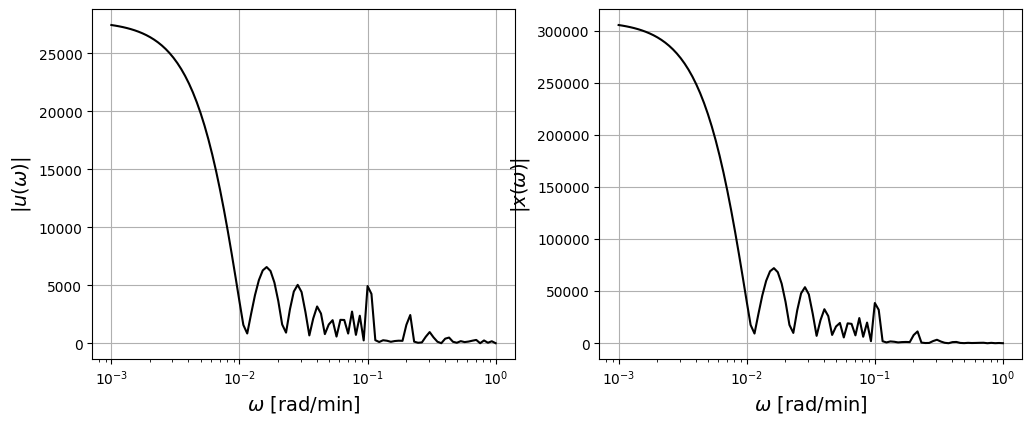

In [24]:
# Get empirical spectrum of u
om = np.logspace(-3, 0, 100)  # frequency range (rad/s)
magu = np.zeros(len(om))
magx = np.zeros(len(om))

for k in range(len(om)):
    sum1 = u * np.cos(om[k] * t)
    B1 = trapz(sum1, t)
    sum2 = u * np.sin(om[k] * t)
    B2 = trapz(sum2, t)
    magu[k] = np.sqrt(B1**2 + B2**2)

# Get empirical spectrum of x
for k in range(len(om)):
    sum1 = x * np.cos(om[k] * t)
    A1 = trapz(sum1, t)
    sum2 = x * np.sin(om[k] * t)
    A2 = trapz(sum2, t)
    magx[k] = np.sqrt(A1**2 + A2**2)

# Visualize spectrum
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.semilogx(om, magu, 'k-', linewidth=1.5)
plt.xlabel('$\omega$ [rad/min]', fontsize=14)
plt.ylabel('$|u(\omega)|$', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.semilogx(om, magx, 'k-', linewidth=1.5)
plt.xlabel('$\omega$ [rad/min]', fontsize=14)
plt.ylabel('$|x(\omega)|$', fontsize=14)
plt.grid(True)

# Get empirical amplitude ratio
AR = magx / magu

[11.10532325  9.92203697]


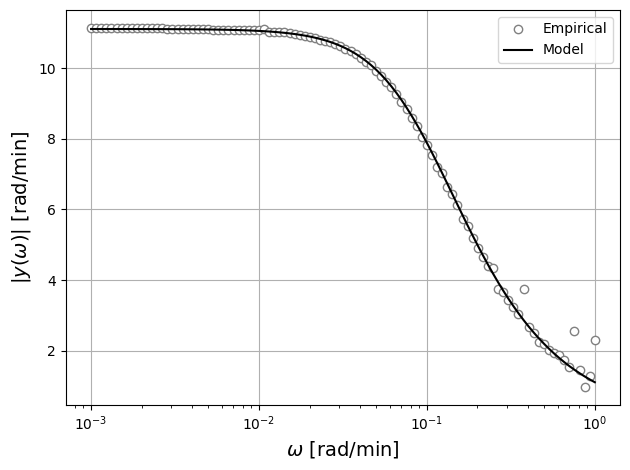

In [25]:
# Formulate estimation problem
def lsfun(th, data):
    AR = data['AR']
    om = data['om']
    K = th[0]
    tau = th[1]
    ARhat = K / np.sqrt((tau * om)**2 + 1)
    return AR - ARhat

th = [1, 1]
thlb = [0, 0]
thub = [100, 100]
data = {'AR': AR, 'om': om}

result = least_squares(lsfun, th, bounds=(thlb, thub), args=(data,), max_nfev=5000)
thhat = result.x

print(thhat)

# Compare model and empirical spectrum
K = thhat[0]
tau = thhat[1]
ARhat = K / np.sqrt((tau * om)**2 + 1)

plt.semilogx(om, AR, 'o', markerfacecolor='w', color=[0.5, 0.5, 0.5])
plt.semilogx(om, ARhat, 'k-', linewidth=1.5)
plt.xlabel('$\omega$ [rad/min]', fontsize=14)
plt.ylabel('$|y(\omega)|$ [rad/min]', fontsize=14)
plt.grid(True)
plt.legend(['Empirical', 'Model'])
plt.tight_layout()
plt.show()


In [26]:
# Back calculate parameters
V = 10000  # cf (building volume)
Q = V / tau
G = K * Q
print(f"Q: {Q}")
print(f"G: {G}")

Q: 1007.8575626081287
G: 11192.584023398655
